# (1): Import Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import matplotlib.patches as mpatches
import tensorflow as tensorflow
import pandas as pd

# (2): The Network Builder:

In [2]:
class NetworkBuilder:
    def __init__(self, verbose = True):

        # DEBUGGING:
        self.verbose = verbose

        # CONSOLE/TERMINAL MESSAGES:

        # INPUTS:
        self._INPUT_PROMPT_NUMBER_1_NUMBER_OF_ANN_LAYERS = "> How many layers do you want in your ANN architecture?"
        self._INPUT_PROMPT_NUMBER_2_NODES_PER_LAYER = "> Choose how many nodes you want for layer {}."
        self._INPUT_PROMPT_NUMBER_3_ACTIVATION_FUNCTION = "> Choose an activation function for layer {}."
        self._INPUT_PROMPT_NUMBER_4_ACTIVATION_FUNCTION = "> Please select the network's loss function."
        self._INPUT_PROMPT_NUMBER_5_INPUT_SHAPE = "> Please specify the number of inputs of your network."

        # ERRORS
        self._ERROR_PROMPT_NUMBER_1_LAYER_NUMBER_NOT_INT = "> Layer number must be a positive, nonzero integer. Continuing..."
        self._ERROR_PROMPT_NUMBER_2_NODES_PER_LAYER_NOT_INTEGER = "> Number of nodes per layer must be an integer type. Continuing..."
        self._ERROR_PROMPT_NUMBER_3_ACTIVATION_FUNCTION_NOT_STRING = "> Activation functions are of string datatype. Continuing..."
        self._ERROR_PROMPT_NUMBER_3_ACTIVATION_FUNCTION_NOT_IN_LIST = "> User input of `{}` is not included in known list of activation functions."
        self._ERROR_PROMPT_NUMBER_4_LOSS_FUNCTION_NOT_STRING = "> The provided loss function was not a string type. Provide one that is. Continuing..."
        self._ERROR_PROMPT_NUMBER_4_LOSS_FUNCTION_NOT_IN_LIST = "> User input of `{}` is not included in known list of loss functions."
        self._ERROR_PROMPT_NUMBER_5_INPUT_SHAPE_INTEGER = "> The user input of {} wasn't an integer."
        self._ERROR_PROMPT_NUMBER_5_INPUT_SHAPE_NEGATIVE = "> Obviously, the size of the input vector cannot be zero or negative."

        # ACTIVATION FUNCTION NAMES:
        self._ACTIVATION_FUNCTIONS_STRING_ELU = "elu"
        self._ACTIVATION_FUNCTIONS_STRING_EXPONENTIAL = "exponential"
        self._ACTIVATION_FUNCTIONS_STRING_GELU = "gelu"
        self._ACTIVATION_FUNCTIONS_STRING_HARD_SIGMOID = "hard_sigmoid"
        self._ACTIVATION_FUNCTIONS_STRING_LINEAR = "linear"
        self._ACTIVATION_FUNCTIONS_STRING_MISH = "mish"
        self._ACTIVATION_FUNCTIONS_STRING_RELU = "relu"
        self._ACTIVATION_FUNCTIONS_STRING_SELU = "selu"
        self._ACTIVATION_FUNCTIONS_STRING_SIGMOID = "sigmoid"
        self._ACTIVATION_FUNCTIONS_STRING_SOFTMAX = "softmax"
        self._ACTIVATION_FUNCTIONS_STRING_SOFTPLUS = "softplus"
        self._ACTIVATION_FUNCTIONS_STRING_SOFTSIGN = "softsign"
        self._ACTIVATION_FUNCTIONS_STRING_SWISH= "swish"
        self._ACTIVATION_FUNCTIONS_STRING_TANH = "tanh"


        # ACTIVATION FUNCTION ARRAY:
        self._ARRAY_OF_ACCEPTABLE_ACTIVATION_FUNCTIONS = [
            self._ACTIVATION_FUNCTIONS_STRING_ELU,
            self._ACTIVATION_FUNCTIONS_STRING_EXPONENTIAL,
            self._ACTIVATION_FUNCTIONS_STRING_GELU,
            self._ACTIVATION_FUNCTIONS_STRING_HARD_SIGMOID,
            self._ACTIVATION_FUNCTIONS_STRING_LINEAR,
            self._ACTIVATION_FUNCTIONS_STRING_MISH,
            self._ACTIVATION_FUNCTIONS_STRING_RELU,
            self._ACTIVATION_FUNCTIONS_STRING_SELU,
            self._ACTIVATION_FUNCTIONS_STRING_SIGMOID,
            self._ACTIVATION_FUNCTIONS_STRING_SOFTMAX,
            self._ACTIVATION_FUNCTIONS_STRING_SOFTPLUS,
            self._ACTIVATION_FUNCTIONS_STRING_SOFTSIGN,
            self._ACTIVATION_FUNCTIONS_STRING_SWISH,
            self._ACTIVATION_FUNCTIONS_STRING_TANH,
        ]

        # LOSS FUNCTION NAMES:
        self._LOSSES_STRING_BINARY_CROSSENTROPY = "binary crossentropy"
        self._LOSSES_STRING_BINARY_FOCAL_CROSSENTROPY = "binary focal crossentropy"
        self._LOSSES_STRING_CATEGORICAL_CROSSENTROPY = "categorical crossentropy"
        self._LOSSES_STRING_CATEGORICAL_FOCAL_CROSSENTROPY = "categorical focal crossentropy"
        self._LOSSES_STRING_CATEGORICAL_HINGE = "cateogrical hinge"
        self._LOSSES_STRING_COSINE_SIMILARITY = "cosine similarity"
        self._LOSSES_STRING_HINGE = "hinge"
        self._LOSSES_STRING_HUBER = "huber"
        self._LOSSES_STRING_KL_DIVERGENCE = "kl divergence"
        self._LOSSES_STRING_LOG_COSH = "log cosh"
        self._LOSSES_STRING_LOSS = "loss"
        self._LOSSES_STRING_MEAN_ABSOLUTE_ERROR = "mean absolute error"
        self._LOSSES_STRING_MEAN_ABSOLULTE_PERCENTAGE_ERROR = "mean absolute percentage error"
        self._LOSSES_STRING_MEAN_SQUARED_ERROR = "mean squared error"
        self._LOSSES_STRING_MEAN_SQUARED_LOGARITHMIC_ERROR = "mean squared logarithmic error"
        self._LOSSES_STRING_POISSON = "poisson"
        self._LOSSES_STRING_REDUCTION = "reduction"
        self._LOSSES_STRING_SPARCE_CATEGORICAL_CROSSENTROPY = "sparce categorical crossentropy"
        self._LOSSES_STRING_SQUARED_HINGE = "squared hinge"

        # LOSS FUNCTION ARRAY:
        self._ARRAY_OF_ACCEPTABLE_LOSS_FUNCTIONS = [
            self._LOSSES_STRING_BINARY_CROSSENTROPY,
            self._LOSSES_STRING_BINARY_FOCAL_CROSSENTROPY,
            self._LOSSES_STRING_CATEGORICAL_CROSSENTROPY,
            self._LOSSES_STRING_CATEGORICAL_FOCAL_CROSSENTROPY,
            self._LOSSES_STRING_COSINE_SIMILARITY,
            self._LOSSES_STRING_CATEGORICAL_HINGE,
            self._LOSSES_STRING_HUBER,
            self._LOSSES_STRING_KL_DIVERGENCE,
            self._LOSSES_STRING_LOG_COSH,
            self._LOSSES_STRING_LOSS,
            self._LOSSES_STRING_MEAN_ABSOLUTE_ERROR,
            self._LOSSES_STRING_MEAN_ABSOLULTE_PERCENTAGE_ERROR,
            self._LOSSES_STRING_MEAN_SQUARED_ERROR,
            self._LOSSES_STRING_MEAN_SQUARED_LOGARITHMIC_ERROR,
            self._LOSSES_STRING_POISSON,
            self._LOSSES_STRING_REDUCTION,
            self._LOSSES_STRING_SPARCE_CATEGORICAL_CROSSENTROPY,
            self._LOSSES_STRING_SQUARED_HINGE
        ]

        # LOSS FUNCTION DICTIONARY:
        self._DICTIONARY_MAP_USER_INPUT_TO_KERAS_LOSS = {
            self._LOSSES_STRING_BINARY_CROSSENTROPY: tensorflow.keras.losses.BinaryCrossentropy(),
            self._LOSSES_STRING_BINARY_FOCAL_CROSSENTROPY: tensorflow.keras.losses.BinaryFocalCrossentropy(),
            self._LOSSES_STRING_CATEGORICAL_CROSSENTROPY: tensorflow.keras.losses.CategoricalCrossentropy(),
            self._LOSSES_STRING_CATEGORICAL_FOCAL_CROSSENTROPY: tensorflow.keras.losses.CategoricalFocalCrossentropy(),
            self._LOSSES_STRING_CATEGORICAL_HINGE: tensorflow.keras.losses.CategoricalHinge(),
            self._LOSSES_STRING_COSINE_SIMILARITY: tensorflow.keras.losses.CosineSimilarity(),
            self._LOSSES_STRING_HINGE: tensorflow.keras.losses.Hinge(),
            self._LOSSES_STRING_HUBER: tensorflow.keras.losses.Huber(),
            self._LOSSES_STRING_KL_DIVERGENCE: tensorflow.keras.losses.KLDivergence(),
            self._LOSSES_STRING_LOG_COSH: tensorflow.keras.losses.LogCosh(),
            self._LOSSES_STRING_LOSS: tensorflow.keras.losses.Loss(),
            self._LOSSES_STRING_MEAN_ABSOLUTE_ERROR: tensorflow.keras.losses.MeanAbsoluteError(),
            self._LOSSES_STRING_MEAN_ABSOLULTE_PERCENTAGE_ERROR: tensorflow.keras.losses.MeanAbsolutePercentageError(),
            self._LOSSES_STRING_MEAN_SQUARED_ERROR: tensorflow.keras.losses.MeanSquaredError(),
            self._LOSSES_STRING_MEAN_SQUARED_LOGARITHMIC_ERROR: tensorflow.keras.losses.MeanSquaredLogarithmicError(),
            self._LOSSES_STRING_POISSON: tensorflow.keras.losses.Poisson(),
            self._LOSSES_STRING_REDUCTION: tensorflow.keras.losses.Reduction(),
            self._LOSSES_STRING_SPARCE_CATEGORICAL_CROSSENTROPY: tensorflow.keras.losses.SparseCategoricalCrossentropy(),
            self._LOSSES_STRING_SQUARED_HINGE: tensorflow.keras.losses.SquaredHinge(),
            }
        

        # ===== MODEL METAPARAMETERS =====

        # (1): Number of Hidden Layers:
        self.number_of_hidden_layers = None

        # (2): A List of the Number of Nodes per Layer:
        self.list_of_number_of_nodes_per_layer = None

        # (3): A List of Activation Functions per Layer:
        self.list_of_activation_functions_for_each_layer = []

        # (4): Keras Loss Function:
        self.model_loss_function = None

        # (5): Model Input Dimension
        self.number_of_input_variables = 0
    
        # (6): Model Input Layer:
        self.model_input_layer = None

        # (7): Model Output:
        self.model_output_layer = None

    # ===== CLASS METHODS =====

    def obtain_number_of_ANN_hidden_layers(self):
        """
        Description
        --------------
        Obtain the number of hidden layers for the ANN from the user.

        
        Parameters
        --------------
        verbose (boolean):
            Do you want to see all output of this function evaluation?
            
        Notes
        --------------
        (1) We just need to obtain a nonzero, positive integer that
        represents the number of layers in the ANN.

        (2) https://stackoverflow.com/a/23294659 -> For a healthy way
        to construct a while loop like this.
        """
        while True:

            try:
                
                number_of_ANN_layers = int(input(self._INPUT_PROMPT_NUMBER_1_NUMBER_OF_ANN_LAYERS))
                
                if self.verbose:
                    print(f"> Received input: {number_of_ANN_layers} ({type(number_of_ANN_layers)}).")

            except ValueError:

                print(self._ERROR_PROMPT_NUMBER_1_LAYER_NUMBER_NOT_INT)
                continue

            if number_of_ANN_layers <= 0:

                print(self._ERROR_PROMPT_NUMBER_1_LAYER_NUMBER_NOT_INT)
                continue

            else:
                
                print(f"> Received input: {number_of_ANN_layers} ({type(number_of_ANN_layers)}). Exiting...")
                break

        if self.verbose:
            print(f"> User defined {number_of_ANN_layers} Layers in the network.")

        self.number_of_hidden_layers = number_of_ANN_layers
        return None
    
    def obtain_nodes_per_layer(self, number_of_ANN_layers):
        """
        Description
        --------------
        Obtain the number of nodes per layer in the ANN.

        
        Parameters
        --------------
        number_of_ANN_layers (int):
            the number of layers in the ANN

        verbose (boolean):
            prints the intermediate computations of the function
        
        Notes
        --------------
        (1) For all each layer, we need to populate it with a number of neurons.
            So, this function is about obtaining a list of intergers that correspond
            to the number of neurons per layer.

        (2) The output is a list of integers.
        """
        list_of_number_of_nodes_per_layer = []

        for layer_index in range(number_of_ANN_layers):

            while True:

                try:

                    number_of_nodes_per_given_layer = int(input(self._INPUT_PROMPT_NUMBER_2_NODES_PER_LAYER.format(layer_index + 1)))

                    if self.verbose:
                        print(f"> Received input: {number_of_nodes_per_given_layer} ({type(number_of_nodes_per_given_layer)}).")

                except ValueError:

                    print(self._ERROR_PROMPT_NUMBER_2_NODES_PER_LAYER_NOT_INTEGER)
                    continue

                print(f"> Received input: {number_of_nodes_per_given_layer} ({type(number_of_nodes_per_given_layer)}). Exiting...")
                list_of_number_of_nodes_per_layer.append(number_of_nodes_per_given_layer)
                break
            
            print(f"> User defined Layer #{layer_index + 1} to have {number_of_nodes_per_given_layer} nodes.")

        self.list_of_number_of_nodes_per_layer = list_of_number_of_nodes_per_layer
        return None
    
    def check_if_activation_function_included(self, user_entered_activation_function = None):
        """
        Description
        --------------
        Sanitize/verify that the user-typed string corresponds to a given and known
        activation function. Checks against the TensorFlow nomenclature.

        
        Parameters
        --------------
        user_entered_activation_function (string):
            the name of the desired activation function for the layer of nodes
            
        
        Notes
        --------------
        (1): At this stage, we are actually validating the list of valid activation function
            names. There's no real reason to do this, but it keeps us accountable.

        """

        if user_entered_activation_function == None:
            return False
        else:
            if user_entered_activation_function in self._ARRAY_OF_ACCEPTABLE_ACTIVATION_FUNCTIONS:
                return True
            else:
                return False
            
    def construct_array_of_layer_activation_functions(self, number_of_ANN_layers):
        """
        Description
        --------------
        Obtain the activation functions for each neuron in a given layer 
        from the user. There are only a few acceptable options for the 
        types of activation functions.


        Parameters
        --------------
        number_of_ANN_layers (int): 
            The number of layers, not including the input data, in the network.
        
            
        Notes
        --------------
        (1) For all neurons in a given layer, we will apply the same activation function.
        """
        list_of_activation_functions_for_each_layer = []

        for layer_index in range(number_of_ANN_layers):

            while True:

                try:

                    user_proposed_activation_function = str(input(self._INPUT_PROMPT_NUMBER_3_ACTIVATION_FUNCTION.format(layer_index + 1)))
                    if self.verbose:
                        print(f"> Received input: {user_proposed_activation_function} ({type(user_proposed_activation_function)}).")

                except ValueError:

                    print(self._ERROR_PROMPT_NUMBER_3_ACTIVATION_FUNCTION_NOT_STRING)
                    continue

                if not self.check_if_activation_function_included(user_proposed_activation_function):

                    print(self._ERROR_PROMPT_NUMBER_3_ACTIVATION_FUNCTION_NOT_IN_LIST.format(user_proposed_activation_function))
                    continue

                else:

                    print(f"> Received input: {user_proposed_activation_function} ({type(user_proposed_activation_function)}). Exiting...")
                    list_of_activation_functions_for_each_layer.append(user_proposed_activation_function)
                    break
            
            print(f"> User defined layer number {layer_index + 1} to use {user_proposed_activation_function} activation.")

        self.list_of_activation_functions_for_each_layer = list_of_activation_functions_for_each_layer
        return None

    def check_if_loss_function_included(self, user_entered_loss_function = None):
        """
        Description
        --------------
        Sanitize/verify that the user-typed string corresponds to a given and known
        activation function. Checks against the TensorFlow nomenclature.

        
        Parameters
        --------------
        user_entered_activation_function (string): 
            the name of the desired loss functions
            
        
        Notes
        --------------
        (1): This is just an intermediate validation. We want to make sure we
            are referring to things that exist. That's why we put this 
            intermediate validation here.

        """

        if user_entered_loss_function == None:
            return False
        else:
            if user_entered_loss_function in self._ARRAY_OF_ACCEPTABLE_LOSS_FUNCTIONS:
                return True
            else:
                return False

    def choose_network_loss_function(self):
        """
        Description
        --------------
        We need a loss function in comparing the model's terrible output with
        actual data. All this function involves is choosing the loss function.


        Parameters
        --------------
            verbose (boolean):
                prints out the intermediate steps in a calculation
        
            
        Notes
        --------------
        """
        while True:

            try:

                user_proposed_loss_function = str(input(self._INPUT_PROMPT_NUMBER_4_ACTIVATION_FUNCTION))
                if self.verbose:
                    print(f"> Received user input of {user_proposed_loss_function} ({type(user_proposed_loss_function)}).")

            except ValueError:

                print(self._ERROR_PROMPT_NUMBER_4_LOSS_FUNCTION_NOT_STRING)
                continue

            if not self.check_if_loss_function_included(user_proposed_loss_function):

                print(self._ERROR_PROMPT_NUMBER_4_LOSS_FUNCTION_NOT_IN_LIST.format(user_proposed_loss_function))
                continue

            else:

                print(f"> Received user input of {user_proposed_loss_function} ({type(user_proposed_loss_function)}). Exiting...")
                break
            
        self.model_loss_function = self.translate_user_input_loss_function_to_keras_loss_function(user_proposed_loss_function)
        return None
    
    def translate_user_input_loss_function_to_keras_loss_function(self, string_user_input_loss_function):
        """
        Description
        --------------
        All this function does is it takes a string of user input that is supposed to
        represent the name of some popular loss function (those included in TensorFlow)
        and attempt to match it with the existing classes available. If the class
        exists, we return that TF instance. If the class does not, then we tell the user
        to get good.

        Parameters
        --------------
        string_user_input_loss_function (string)
            the name of the desired loss function as a string
        
            
        Notes
        --------------
        (1): We reference a huge dictionary.
        """
        try:
            return self._DICTIONARY_MAP_USER_INPUT_TO_KERAS_LOSS.get(string_user_input_loss_function, None)
        
        except Exception as E:
            print(f"> Error in translating input: {string_user_input_loss_function} to Keras Loss class instance:\n> {E}")
            return None

    def obtain_number_of_input_variables(self):
        """
        Description
        --------------
        The number of input variables in the feed-forward network.


        Parameters
        --------------
        number_of_input_variables (int): 
            The number of input variables we want to feed into the network.
        
            
        Notes
        --------------
        (1) Unusually, the input layer is defined according to a "vector" of
            length number_of_input_variables. So, we need to obtain the dimension
            of this "input vector." That's what this function is about.
        """
        while True:

                try:

                    number_of_input_variables = int(input(self._INPUT_PROMPT_NUMBER_5_INPUT_SHAPE))
                    if self.verbose:
                        print(f"> Received input: {number_of_input_variables} ({type(number_of_input_variables)}).")

                except ValueError:

                    print(self._ERROR_PROMPT_NUMBER_5_INPUT_SHAPE_INTEGER.format(number_of_input_variables))
                    continue

                if number_of_input_variables <= 0:

                    print(self._ERROR_PROMPT_NUMBER_5_INPUT_SHAPE_NEGATIVE)
                    continue

                else:

                    print(f"> Received user input of {number_of_input_variables} ({type(number_of_input_variables)}). Exiting...")
                    self.number_of_input_variables = number_of_input_variables
                    break
            
        return None
    
    def calculate_output_layer_as_nested_hidden_layers(self, inputs, number_of_hidden_layers, list_of_nodes_per_layer, list_of_activation_functions):
        """
        Description
        --------------
        This function performs a recursive call to itself in order to properly
        nest every instance of a Keras Dense() instance into an earlier one. That
        is how we can stack Dense layers together.

        Parameters
        --------------
        input (Keras Dense() or Input() instance): 
            the way this works is that we need to stack Dense()() layers
            so that we can get the recursion Dense(N)(Dense(M)(Dense(P)(...))).

        number_of_hidden_layers (int): 
            while we don't use a for-loop below, we are using this integer to 
            effectively perform a loop by decrementing an index number.
        
            
        Notes
        --------------
        None
        """
        if len(list_of_nodes_per_layer) is not len(list_of_activation_functions):
            print(f"> Mismatching length of lists: {len(list_of_nodes_per_layer)} in list of nodes per layer but {len(list_of_activation_functions)} in list of activation functions.")
            return None

        if number_of_hidden_layers == 0:
            return inputs
        
        else:
            
            number_of_nodes_in_this_layer = list_of_nodes_per_layer[number_of_hidden_layers - 1]
            activation_function_in_this_layer = list_of_activation_functions[number_of_hidden_layers - 1]


            if self.verbose:
                print(f"> Now initializing a TF Dense() layer with {number_of_nodes_in_this_layer} nodes and {activation_function_in_this_layer} activations.")
                
            nested_layer = tensorflow.keras.layers.Dense(
                number_of_nodes_in_this_layer,
                activation = activation_function_in_this_layer,
                use_bias = True,
                kernel_initializer = 'glorot_uniform',
                bias_initializer = 'zeros',
                kernel_regularizer = None,
                bias_regularizer = None,
                activity_regularizer = None,
                kernel_constraint = None,
                bias_constraint = None,
                )(self.calculate_output_layer_as_nested_hidden_layers(inputs, number_of_hidden_layers - 1, list_of_nodes_per_layer, list_of_activation_functions))
            return nested_layer
        
    def register_tensorflow_model(self, input_layer, output_layer):
        """
        Description
        --------------
        All this function does is return for us a Keras Model() instance
        with the inputs and outputs kwargs specified. 

        Parameters
        --------------
        input_layer (Keras Input() instance): 
            the actual Keras Input() layer instance

        output_layer (Keras Input() instance): 
            this should be some kind of Keras Layer() instance as 
            obtained by nesting layers together
        
            
        Notes
        --------------
        None
        """

        try:

            new_tensorflow_model = tensorflow.keras.models.Model(
                inputs = input_layer,
                outputs = output_layer
            )
            self.tensorflow_network = new_tensorflow_model
        
        except Exception as E:
            
            print(f"> Error in constructing a Keras model:\n> {E}")
            return None

    def compile_tensorflow_network(self, tensorflow_network, keras_loss_function):
        """
        Description
        --------------
        Actually compile the TensorFlow ANN with all the details that 
        we supplied earlier. In reality, this function does nothing but
        use the .compile() method, sets the (i) optimizer, (ii) loss,
        and (iii) metrics.

        Parameters
        --------------
        tensorflow_network (int): 
            The number of input variables we want to feed into the network.
        
            
        Notes
        --------------
        (1) Unusually, the input layer is defined according to a "vector" of
            length number_of_input_variables. So, we need to obtain the dimension
            of this "input vector." That's what this function is about.
        """
        if tensorflow_network == None:
            print(f"> No TensorFlow network instance supplied. Exiting...")
            return None
        
        try:
            tensorflow_network.compile(
            optimizer = tensorflow.keras.optimizers.Adam(
                learning_rate = 0.001,
                beta_1 = 0.9,
                beta_2 = 0.999,
                epsilon = 1e-07,
                amsgrad = False,
                weight_decay = None,
                clipnorm = None,
                clipvalue = None,
                global_clipnorm = None,
                use_ema = False,
                ema_momentum = 0.99,
                ema_overwrite_frequency = None,
                jit_compile = True,
                name='Optimizer_Adam',
            ),
            loss = keras_loss_function,
            metrics = tensorflow.keras.metrics.MeanSquaredError(),
            loss_weights = None,
            weighted_metrics = None,
            run_eagerly = None,
            steps_per_execution = None,
            jit_compile = None,
            pss_evaluation_shards = 0,
        )
            self.tensorflow_network = tensorflow_network
            return None
        except Exception as E:
            print(f"> Error in compiling the TensorFlow network:\n> {E}")
            return None

    def describe_tensorflow_network(self, tensorflow_network):
        """
        Description
        --------------
        TensorFlow's description of the network.

        Parameters
        --------------
        tensorflow_network (int): 
            The instance of the tensorflow network.
        
            
        Notes
        --------------
        None
        """
        try:
            return tensorflow_network.summary()
        
        except Exception as E:
            
            print(f"> Error in describing the TF network:\n> {E}")
            return None

        
    def build_network(self):
        
        # (1): Obtain the number of layers:
        self.obtain_number_of_ANN_hidden_layers()
        if self.verbose:
            print(f"> [1]: Obtained number of ANN hidden layers.")

        # (2): Obtain the number of nodes per layer:
        self.obtain_nodes_per_layer(self.number_of_hidden_layers)
        if self.verbose:
            print(f"> [2]: Obtained list with number of nodes per layer.")

        # (3): Obtain the activation functions for each layer:
        self.construct_array_of_layer_activation_functions(self.number_of_hidden_layers)
        if self.verbose:
            print(f"> [3]: Obtained activation functions for each layer.")

        # (4): Obtain the network's loss function:
        self.choose_network_loss_function()
        if self.verbose:
            print(f"> [4]: Obtained the network's loss function.")

        # (5): Obtain the Network Input Dimensionality:
        self.obtain_number_of_input_variables()
        if self.verbose:
            print(f"> [5]: Obtained the input layer's dimensionality.")

        # (6): Obtain the Actual Network Inputs (Keras Layers):
        self.model_input_layer = tensorflow.keras.layers.Input(shape = (self.number_of_input_variables, ))
        if self.verbose:
            print(f"> [6]: Registered the network's first layer.")

        # (7): Obtain the Actual Network Outputs (Keras Layers):
        self.model_output_layer = self.calculate_output_layer_as_nested_hidden_layers(
            self.model_input_layer,
            self.number_of_hidden_layers,
            self.list_of_number_of_nodes_per_layer,
            self.list_of_activation_functions_for_each_layer
        )
        if self.verbose:
            print(f"> [7]: Computed the network's output layer.")

        # (8): Register the TensorFlow Model:
        self.register_tensorflow_model(self.model_input_layer, self.model_output_layer)
        if self.verbose:
            print(f"> [8]: Registered TensorFlow model...")

        # (9): Compile the Model:
        self.compile_tensorflow_network(self.tensorflow_network, self.model_loss_function)
        if self.verbose:
            print(f"> [9]: Network compiled!")

        # (10): Describe the Model:
        self.describe_tensorflow_network(self.tensorflow_network)
        if self.verbose:
            print(f"> [10]: Network described.")

        return self.tensorflow_network

# (3): Trying to Visualize a Network:

The next thing that I want to do is to come up with a way to visualize the network architecture. Even though this is a totally irrelevant step with regards to the actual construction of a TensorFlow network, I need to be able to see exactly how the network looks in terms of the way its nodes and their connections are laid out.

So, what we're going to do is code up a nice-looking diagram in Matplotlib to show us exactly how the network architecture is laid out.

First, we need to remind ourselves of exactly what the Plot actually will require. Firstly, since the standard diagram of ANNs is a bunch of nodes (spheres) that are connected on lines, I want to say that we'll probably need to add some Circles and Lines on the plot. It seems that we can use Matplotlib's `Patches()` class to help us with this. In particular, they offer `Rectangle` and `Circle`. Actually, it looks like they offer `Line2D`.

The idea is that our nodes will become circles that are specified with a given $(x, y)$ position on a grid and a radius. We want to stack all nodes in the same layer on the same $x$-coordinate -- That will ensure that those nodes appear to be on the same layer. Then, given a layer with $N$ nodes, we'll figure out the appropriate $y$-coordinates along that line of constant $x$ that will allow us to not cram all the nodes together. Those $y$-coordinates will also inform us of how large our nodes ought to appear.

First, let's do the $x$-coordinates of the circles. The idea is the following. Provided we have $N$ hidden layers, then we need to partition a grid of length $L_{x}$ into partitions of equal $x$-lengths. We also do not want to have the nodes actually touch the border of the grid. We can set $L_{x}$ to 1 in the calculations, but we have to derive an equation that basically gives $\Delta x_{i}$, the separation distance between each partition.

A quick example will provide for us the stepping stone that we can then use to derive a general formula:

Suppose we have $3$ hidden layers. We also want to include the input layer as a layer in the actual grid. Then, that corresponds to $3 + 1$ total $x$-coordinates that specify the location of each partition. This means that the total length along the $x$-axis is obtained simply by performing $(3 + 1) \Delta x = L_{x}$. Rearranging this gives, of course, $\Delta x = \frac{L_{x}}{3 + 1}$. So, clearly, if our $L_{x} = 1$, then our lines that partition our graph will have $x$-coordinates of `[0.25, 0.50, 0.75]`. Does that work? Let's check. We'll also use list comprehension to generate this list.

## (3.1): Creating the Network

In [3]:
test_network_1 = NetworkBuilder()
test_network_1.build_network()
for index in range(test_network_1.number_of_hidden_layers):
    print(test_network_1.list_of_number_of_nodes_per_layer[index])
    print(test_network_1.list_of_activation_functions_for_each_layer[index])

> Layer number must be a positive, nonzero integer. Continuing...


KeyboardInterrupt: Interrupted by user

## (3.2): Constructing the Visualization:

In [ ]:
def compute_x_coordinates_of_graph_partitions(graph_width: float, number_of_total_layers: int) -> tuple:
    """
    Description
    --------------
    Obtain the number of hidden layers for the ANN from the user.

    
    Parameters
    --------------
    graph_width (float):
        the width of the graph

    number_of_total_layers (int):
        the *total* number of layers in the ANN
        
    Function Flow:
    --------------


    Notes
    --------------
    """
    try:
        
        delta_x_layer_spacing = graph_width / (number_of_total_layers + 1)

        partition_coordinates = [((layer_number_minus_one + 1) * graph_width) / (number_of_total_layers + 1) for layer_number_minus_one in range(number_of_total_layers)]
        
        tuple_with_coordinates_and_spacing = (delta_x_layer_spacing, partition_coordinates)
        
        return (tuple_with_coordinates_and_spacing)
    except Exception as E:
        pass

In [ ]:
def compute_x_coordinate_of_ann_node(graph_width, node_number, number_of_total_layers):
    """
    Description
    --------------
    Calculate the actual x-coordinate of a given node in
    an ANN.

    
    Parameters
    --------------
    graph_width (float):
        the width of the graph

    number_of_total_layers (int):
        the *total* number of layers in the ANN
        
    Notes
    --------------
    """
    try:
        x_coordinate_of_node = node_number * graph_width / (number_of_total_layers + 1)
        return x_coordinate_of_node
    except Exception as E:
        return None

In [ ]:
def compute_optimal_radius_for_nodes(graph_height: float, x_spacing_between_layers: float, number_of_nodes_in_layer: int, radial_reduction_parameter = 0.1) -> float:
    """
    Description
    --------------
    Calculate the radius of an ANN node in a visual depiction of the network.
    This radius must not overlap with any other node in a respectable vicinity.

    
    Parameters
    --------------
    graph_height (float):
        the height of the graph

    x_spacing_between_layers (float):
        the x-distance between hidden ANN layers

    number_of_total_layers (int):
        the *total* number of layers in the ANN

    radial_reduction_parameter (float):
        e = radial_reduction_parameter * r_max

    Function Flow
    --------------
    (1): Determine the maximum radius that a node can
    take (along the y-axis) given a figure height of
    h and a layer of N nodes.

    (2): Scale that radius down by some perc


    Notes
    --------------
    (1): This function was constructed according to the following
    considerations:

        (i): We want the maximum radius that node i could have in a
        layer with N nodes and a figure height of L.
        
        (ii): The constraint is: L = sum N(i)* 2 * r_max. Then, solve
        for r_max.

        (iii): Now, decompose r_max = r' + e. We want to now solve for r',
        the desired radius. The decomposition gives us an e buffer, which
        player the role of the spacing between nodes (spacing is 2 * e).

        (iv): Demand that e = r'/r_max, and then solve for r'.
        
    """
    _RADIAL_REDUCTION_PARAMETER_STEP_CHANGE = 10 ** (-1 * len(str(radial_reduction_parameter).split('.')[1]))
    try:

        # (1): Check if radial_reduction_parameter is between 0 and 1:
        if radial_reduction_parameter < 0 or radial_reduction_parameter > 1:
            return 0.

        # (2): Determine maximum node radius:
        maximum_node_radius_along_y_axis = graph_height / (2. * number_of_nodes_in_layer)

        # (3): Scale the maximum radius down using a given parameter:
        scaled_node_radius = maximum_node_radius_along_y_axis * (1. - radial_reduction_parameter)

        # (4): If the scaled radius overlaps with nodes in different layers, iterate until it works:
        if scaled_node_radius > x_spacing_between_layers:
            return compute_optimal_radius_for_nodes(
              graph_height,
              x_spacing_between_layers,
              number_of_nodes_in_layer,
              _RADIAL_REDUCTION_PARAMETER_STEP_CHANGE
            )
        else:
            return 0
    
    except Exception as E:

        print(f"> Error in computing the optimal radius:\n> {E}")
        return 0.

## (3.3): Putting Things into Matplotlib:

In [ ]:
_INPUT_HOW_MANY_PLOTS_NEEDED = "> How many plots do you want on the figure?"
_INPUT_IS_PLOT_OF_DATA_OR_NOT = "> Will this plot be important in displaying quantitative data?"

plt.rcParams['figure.figsize']

FIGURE_X_AXIS_WIDTH_IN_INCHES = 2.
FIGURE_Y_AXIS_HEIGHT_IN_INCHES = 2.
FIGURE_DIMENSION = (FIGURE_X_AXIS_WIDTH_IN_INCHES, FIGURE_Y_AXIS_HEIGHT_IN_INCHES)

FIGURE_DOTS_PIXELS_PER_INCH = 100.0

# (1): Create the Main Figure instance:
figure_neural_network_architecture = plt.figure(
    figsize = FIGURE_DIMENSION,
    dpi = FIGURE_DOTS_PIXELS_PER_INCH,
    facecolor = "#032742"
)

# (2): Add an Axis to the Main Figure:
AXES_ONE_LEFT = 0.
AXES_ONE_BOTTOM = 0.
AXES_ONE_WIDTH = 1.0 * FIGURE_X_AXIS_WIDTH_IN_INCHES
AXES_ONE_HEIGHT = 1.0 * FIGURE_Y_AXIS_HEIGHT_IN_INCHES
axes_neural_network_architecture = figure_neural_network_architecture.add_axes((AXES_ONE_LEFT, AXES_ONE_BOTTOM, AXES_ONE_WIDTH, AXES_ONE_HEIGHT))

# (3): Disable the Tick Params:
axes_neural_network_architecture.tick_params(
    axis = 'both', 
    which = 'both', 
    length = 0, 
    labelbottom = False, 
    labeltop = False, 
    labelleft = False,  
    labelright = False)

# (4): Disable the Axes:
axes_neural_network_architecture.axis(False)

# (5): Obtain the x-positions of the layers:
delta_x_spacing, layer_x_positions = compute_x_coordinates_of_graph_partitions(
    FIGURE_X_AXIS_WIDTH_IN_INCHES, 
    test_network_1.number_of_hidden_layers + 1
)

for layer_number_minus_one in range(test_network_1.number_of_hidden_layers + 1):

    if layer_number_minus_one == 0:
        
        number_of_nodes_for_layer = test_network_1.number_of_input_variables
        activation_function_for_layer = 'input'

    else:

        number_of_nodes_for_layer = test_network_1.list_of_number_of_nodes_per_layer[layer_number_minus_one - 1]
        activation_function_for_layer = test_network_1.list_of_activation_functions_for_each_layer[layer_number_minus_one - 1]

    circle_x_centroid = layer_x_positions[layer_number_minus_one]
    
    # node_radius = compute_optimal_radius_for_nodes(FIGURE_Y_AXIS_HEIGHT_IN_INCHES, delta_x_spacing, number_of_nodes_for_layer) / 2.

    node_color_based_on_activation_function = "#fe8675" if activation_function_for_layer == 'linear' else "#d45fa4"
    
    for node_index in range(number_of_nodes_for_layer):

        circle_y_centroid = compute_x_coordinate_of_ann_node(
            FIGURE_Y_AXIS_HEIGHT_IN_INCHES,
            node_index + 1,
            number_of_nodes_for_layer
        )

        axes_neural_network_architecture.add_artist(
            mpatches.Circle(
                (
                    circle_x_centroid / FIGURE_X_AXIS_WIDTH_IN_INCHES, 
                    circle_y_centroid / FIGURE_Y_AXIS_HEIGHT_IN_INCHES
                    ),
                radius = 0.02,
                color = node_color_based_on_activation_function,
                )
            )
        
for layer_number_minus_one in range(test_network_1.number_of_hidden_layers + 1):

    if layer_number_minus_one == 0:
        
        number_of_nodes_for_layer = test_network_1.number_of_input_variables

    else:

        number_of_nodes_for_layer = test_network_1.list_of_number_of_nodes_per_layer[layer_number_minus_one - 1]

    axes_neural_network_architecture.add_artist(
            mpatches.Line2D(
                (
                    circle_x_centroid / FIGURE_X_AXIS_WIDTH_IN_INCHES, 
                    circle_y_centroid / FIGURE_Y_AXIS_HEIGHT_IN_INCHES
                    ),
                radius = 0.02,
                color = node_color_based_on_activation_function,
                )
            )

NameError: name 'compute_x_coordinates_of_graph_partitions' is not defined

In [ ]:
compute_optimal_radius_for_nodes(10, 0.5, 5)

In [ ]:
10 ** (-1 * len(str(10 ** (-1 * len(str(0.05).split('.')[1]))).split('.')[1]))

In [ ]:
10 ** (-1 * len(str(0.00005).split('.')[1]))

In [ ]:
str(0.0005).split('.')

In [ ]:
def calculate_step_size(parameter):
    """
    Calculate the step size based on the precision of the parameter.

    Parameters:
    - parameter (float): The parameter value.

    Returns:
    - float: The calculated step size.
    """
    param_str = str(parameter)
    if 'e' in param_str:
        mantissa, exponent = map(float, param_str.split('e'))
        precision = len(str(mantissa).split('.')[1])
        step_size = 10 ** (exponent - precision)
    else:
        precision = len(param_str.split('.')[1])
        step_size = 10 ** (-precision)
    return step_size

# Test the function
parameter_values = [0.1, 0.5, 0.04, 0.0005, 1e-10]

for param in parameter_values:
    step_size = calculate_step_size(param)
    print(f"For parameter {param}, the step size is {step_size}")


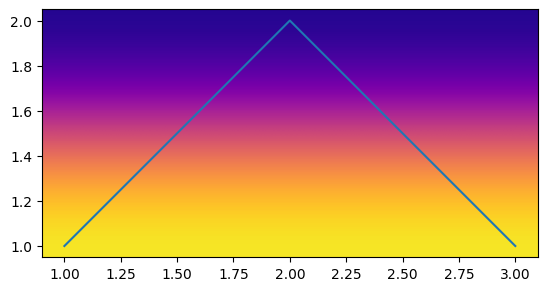

In [ ]:
import matplotlib.pyplot as mplt  

fig = mplt.figure()  
ax = fig.add_subplot(111)  
mplt.plot([1,2,3],[1,2,1])  
plotlim = mplt.xlim() + mplt.ylim()  
ax.imshow([[0,0],[1,1]], cmap = mplt.cm.plasma, interpolation='bicubic', extent=plotlim)  
mplt.draw()  

In [ ]:
# for gradient backgrounds -> https://matplotlib.org/stable/gallery/color/colormap_reference.html 

In [ ]:
# CERN Colors from: https://www.youtube.com/watch?v=aK7u7Yvpc5Q
# background: #024774 to #05243d
# curve-fill: #f1665c
# something-else: #f2bf86
# data-errorbars: #f4f5f4
# points: #c8bfea
# residuals: #f6bc64
# more residuals: #f4f89e

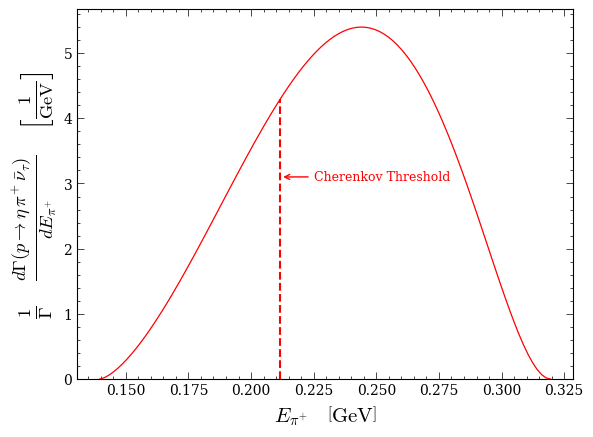

In [2]:
%matplotlib inline
# https://stackoverflow.com/questions/9012487/savefig-outputs-blank-image#comment83223814_9012749

# Load the data from the CSV file
plt.rcParams.update(plt.rcParamsDefault)

plt.rcParams["font.family"] = "serif"

plt.rcParams["mathtext.fontset"] = "cm" # https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_fontfamily_example.html


# These slightly-modified styles come from: https://github.com/garrettj403/SciencePlots/blob/master/scienceplots/styles/science.mplstyle
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True    

# Set y axis
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

data = pd.read_csv('spectrum.csv', header=None)

# Extract x and y values from the DataFrame
x = data[0]
y = data[1] 

pion_cherenkov_threshold = 0.2116947
y_value = np.interp(pion_cherenkov_threshold, x, y)

# Plot the data using Matplotlib
plt.plot(x, y, color = 'red', lw = 0.9)
plt.vlines(x = pion_cherenkov_threshold, ymin = 0, ymax = y_value, color='red', linestyle = 'dashed')
plt.ylim(bottom=0)
plt.annotate(
    'Cherenkov Threshold',
    xy = (pion_cherenkov_threshold, 3.1),
    xytext = (0.225, 3.05),
    color = "red",
    fontsize = 9,
    arrowprops = dict(
        arrowstyle = '->',
        color = 'red'
        ))

plt.xlabel(r"$E_{\pi^{+}} \quad \left[ \text{GeV} \right]$", fontsize = 15)
plt.ylabel(r"$\frac{1}{\Gamma} \quad \frac{d \Gamma (p \to \eta \, \pi^{+} \, \bar\nu_{\tau})}{d E_{\pi^{+}}} \quad \left[\frac{1}{\text{GeV}}\right]$", fontsize = 19)

plt.savefig('pi_plus_spectrum_v6.eps', format = "eps")

plt.show()

In [18]:
from scipy.integrate import trapezoid

filtered_df = data[data[0] >= 0.2116947]

area = trapezoid(filtered_df[1], filtered_df[0])

In [23]:
area / 0.532895

0.7296166485474642

In [14]:
data[0][4] - data[0][3]

0.0017999663203349114

In [15]:
data[0][40] - data[0][30]

0.017999663203349392